In [1]:
import numpy as np
import math
import random
from random import shuffle
import matplotlib.pyplot as plt

In [15]:
with open('input.txt') as f:
    n = int(f.readline())
    A = np.zeros((n+1,n+1))
    for line in f: 
        a, b = [int(x) for x in line.split()]
        A[a][b] = 1

In [16]:
def myshuffle(n):
    x = []
    for i in range(1, n+1):
        x.append(i)
    shuffle(x)
    return(x)

In [17]:
def objective(chrome):
    obj = 0
    for i in range(n):
        obj += penalty(i, chrome)
    return obj

In [18]:
def penalty(i, chrome):
    penalt = 0
    for j in range(i+1, n):
        if A[chrome[j]][chrome[i]] == 1:
            penalt += 1
    return penalt

In [19]:
def index_max_p(chrome):
    max_penalty = 0
    index = 0
    for i in range(n-1):
        current_p = penalty(i,chrome)
        if max_penalty < current_p:
            max_penalty = current_p
            index = i
    return index

In [44]:
population_size = 40
max_pop_size = 50
crossover_coeff = 0.8
mutation_coeff = 0.3
max_iteration = 500
num_crossover = round(population_size*crossover_coeff)
num_mutation = round(population_size*mutation_coeff)

population = []
object_values = []
best_objective = 500
best_chromosome = []

best_objs = []

In [45]:
def init_pop(length):
    for i in range(length):
        x = myshuffle(n)
        population.append(x)
        object_values.append(objective(x))

In [46]:
init_pop(population_size)

In [47]:
for i in range(max_iteration):
    
##### roulette wheel #####
    summation = sum(object_values)
    pr = []
    cumulative_pr = []
    for i in range(population_size):
        pr.append(object_values[i]/summation)
    cumulative_pr.append(pr[0])
    for i in range(1, population_size-1):
        temp = cumulative_pr[i-1] + pr[i]
        cumulative_pr.append(temp)
    cumulative_pr.append(1)

    for i in range(0, int(num_crossover)):
        p1 = 0
        temp = np.random.rand()
        while cumulative_pr[p1] < temp:
            p1 = p1 + 1
        p2 = p1
        while p1 == p2:
            temp = np.random.rand()
            p = 0
            while cumulative_pr[p] < temp:
                p = p + 1
            p2 = p

        parent1 = population[p1]
        parent2 = population[p2]
        
##### crossover #####
        temp = np.random.randint(n)
        temp_2 = temp
        child1 = parent1[0:temp] 
        while temp_2 < n:
            if parent2[temp%n] in child1:
                temp += 1
            else:
                child1.append(parent2[temp%n])
                temp_2 += 1
            
        population.append(child1)
        object_values.append(objective(child1))

##### mutation ##### 
    for i in range(num_mutation):
        temp = np.random.randint(num_crossover)
        temp = population_size + temp 
        mutated = population[temp].copy()
        i = index_max_p(mutated)
        j = random.randint(i+1,n-1)
        mutated[i] = population[temp][j]
        mutated[j] = population[temp][i]
        population.append(mutated)
        object_values.append(objective(mutated))  

        
##### ----------- #####
    # update best solution
    best_objective = min(object_values)
    best_arg = np.argmin(object_values)
    best_chromosome = population[best_arg]

    # keep best chromosomes
    if len(population) > max_pop_size:
        temp_population = []
        temp_objective = []
        args = np.argsort(object_values)
        for i in range(max_pop_size):
            temp_population.append(population[args[i]])
            temp_objective.append(object_values[args[i]])
        population = temp_population
        object_values = temp_objective
        population_size = max_pop_size
        
    best_objs.append(best_objective) 


In [48]:
print(best_objective)
print(best_chromosome)

2
[20, 7, 16, 3, 8, 1, 4, 2, 15, 6, 13, 9, 11, 14, 10, 19, 18, 12, 17, 5]


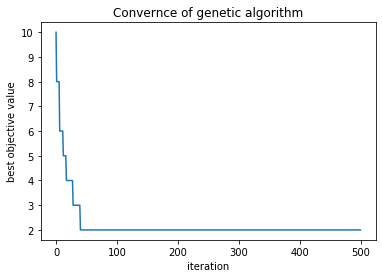

In [49]:
x = []
for i in range(max_iteration):
    x.append(i)
y = best_objs
 

plt.plot(x, y)
plt.xlabel('iteration')
plt.ylabel('best objective value')
 

plt.title('Convergence of genetic algorithm')
plt.show()